In [108]:
import pandas as pd
import path  # pip install --user path.py
import re
from IPython.display import display

In [106]:
# load seaborn
import seaborn  # pip install --user seaborn
%matplotlib inline

In [2]:
classes = pd.read_pickle("classes.pkl")
node_pairs = pd.read_pickle("paths_with_classes.pkl").drop("shortest_path", axis=1)

In [3]:
node_pairs["class_"].value_counts()

3    501760
2    301056
4    172032
5    100352
1     86016
6     12288
0      5376
Name: class_, dtype: int64

In [4]:
TEST_RESULT_DIRECTORIES = [
    path.Path(path_) for path_ in (
        "/home/shibbiry/Dropbox/documents/msu/bachelors_thesis_cluster_topology/test_results/2017-02-12__118_nodes",
        "/home/shibbiry/Dropbox/documents/msu/bachelors_thesis_cluster_topology/test_results/2017-02-10__110_nodes",
        "/home/shibbiry/Dropbox/documents/msu/bachelors_thesis_cluster_topology/test_results/2016-11-04-lom2_100_nodes"
    )
]

In [5]:
def read_benchmark_hostnames(path_to_file):
    lines = path_to_file.lines()
    return (re.match(r"^(n\d{5})\.", line).groups()[0] for line in lines)

In [6]:
for directory in TEST_RESULT_DIRECTORIES:
    hostnames = frozenset(read_benchmark_hostnames(directory.joinpath("network_hosts.txt")))
    
    pairs_tested = node_pairs[
        node_pairs["node1"].isin(hostnames) &
        node_pairs["node2"].isin(hostnames)
    ]
    
    display("{0}/{1}".format(len(pairs_tested["class_"].unique()), len(classes)))

'7/7'

'7/7'

'7/7'

## Load and parse netcdf

In [7]:
import netCDF4

In [28]:
foo = netCDF4.Dataset(TEST_RESULT_DIRECTORIES[0].joinpath("network_median.nc"), "r")

In [63]:
for var in foo.variables:
    if len(foo[var].dimensions) == 0:
        print("{0} = {1}".format(var, foo[var][0]))

proc_num = 118
test_type = 1
data_type = 2
begin_mes_length = 0
end_mes_length = 10000
step_length = 100
noise_mes_length = 0
num_noise_mes = 1
num_noise_proc = 0
num_repeates = 100


In [99]:
def import_data(directory):
    hostnames = tuple(read_benchmark_hostnames(directory.joinpath("network_hosts.txt")))
    with netCDF4.Dataset(directory.joinpath("network_median.nc"), "r")  as dataset:
        proc_num = dataset["proc_num"][0]
        assert dataset["test_type"][0] == 1
        assert dataset["begin_mes_length"][0] == 0
        assert dataset["end_mes_length"][0] == 10000
        assert dataset["step_length"][0] == 100
        data_len_0 = pd.DataFrame(foo["data"][0], index=hostnames, columns=hostnames)
    return data_len_0

In [100]:
data = import_data(TEST_RESULT_DIRECTORIES[0])

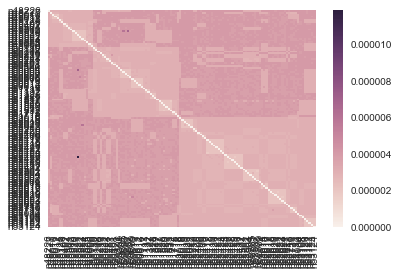

In [102]:
seaborn.heatmap(data)

In [73]:
# todo
# написать рисовалку хитмап одного слоя data
# и каких-нибудь там 3д отображений одного слоя data с погрешностью
# написать предсказывалку, берущую медиану из соотв. класса
# посчитать какую-нибудь метрику для этой предсказывалки